In [1]:
# script for resampling fabdem down to uavsar resolution and extent

import numpy as np
import rasterio as rio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import rioxarray as rxr # for the extension to load
import xarray as xr

In [2]:
# from https://corteva.github.io/rioxarray/stable/examples/reproject_match.html
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [8]:
# import dem from the geolocation function
uavsar_dem_raw =rxr.open_rasterio('/Users/jacktarricone/ch1_jemez_data/new_py_inc/lkv.z.tif')
uavsar_dem = uavsar_dem_raw.where(uavsar_dem_raw != 0) # 0 to np.nan

In [9]:
# import fabdem naheem downloaded from gee
fabdem = rxr.open_rasterio('/Users/jacktarricone/ch1_jemez_data/new_py_inc/jemez_fabdem.tif')

In [ ]:
# plot uavsar
# fig, axes = plt.subplots()
# uavsar_dem.plot()
# plt.draw()

In [ ]:
# plot fabdem
# fig, axes = plt.subplots()
# fabdem.plot()
# plt.draw()

In [10]:
# print("FABDEM:\n----------------\n")
# print_raster(fabdem)
# print("UAVSAR:\n----------------\n")
# print_raster(uavsar_dem)

FABDEM:
----------------

shape: (2108, 3135)
resolution: (0.00026949458523585647, -0.00026949458523585647)
bounds: (-106.90553752262667, 35.55792405977461, -106.06067199791227, 36.12601864545179)
sum: 15122113536.0
CRS: EPSG:4326

UAVSAR:
----------------

shape: (6931, 4486)
resolution: (5.556e-05, -5.556e-05)
bounds: (-106.56379699707031, 35.72026031968749, -106.31455483707032, 36.1053466796875)
sum: -270390050816.0
CRS: EPSG:4326



In [11]:
# uavsar_dem lat lon bounds
bounds = uavsar_dem.rio.bounds()
# print(bounds)

(-106.56379699707031, 35.72026031968749, -106.31455483707032, 36.1053466796875)


In [12]:
# define for cropping
min_lon = bounds[0]
min_lat = bounds[1]
max_lon = bounds[2]
max_lat = bounds[3]

In [13]:
# crop fabdem to uavsar extent
fabdem_crop = fabdem.rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)

In [ ]:
# test plot
# fig, axes = plt.subplots(1, figsize=(8,12))
# fabdem_crop.plot()
# plt.draw()

In [14]:
# resample cropped fabdem down to uavsar resolution
fabdem_resamp = fabdem_crop.rio.reproject_match(uavsar_dem)

In [ ]:
print("Resampled FABDEM:\n----------------\n")
print_raster(fabdem_resamp)
print("UAVSAR:\n----------------\n")
print_raster(uavsar_dem)

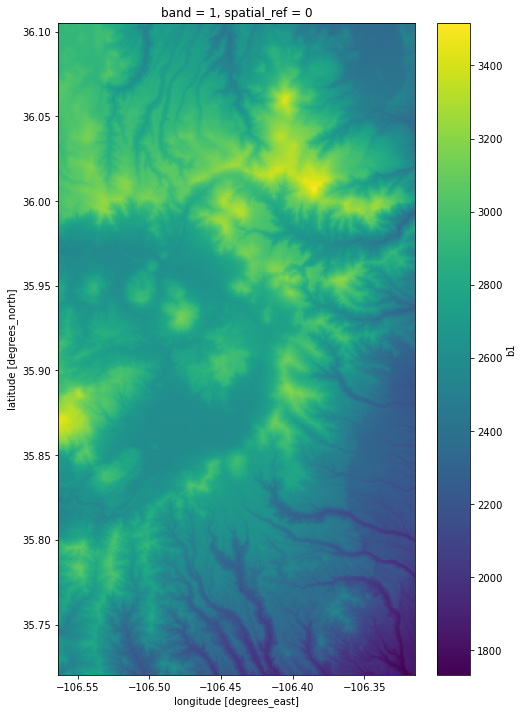

In [15]:
# test plot
fig, axes = plt.subplots(1, figsize=(8,12))
fabdem_resamp.plot()
plt.draw()

In [26]:
# mask fabdem by NaNs in uavsar dem, convert to np.array
fabdem_resamp.data[np.isnan(uavsar_dem.data)] = np.nan
fabdem_final = fabdem_resamp.data[0]

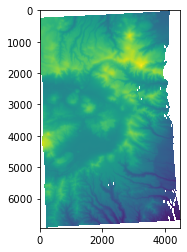

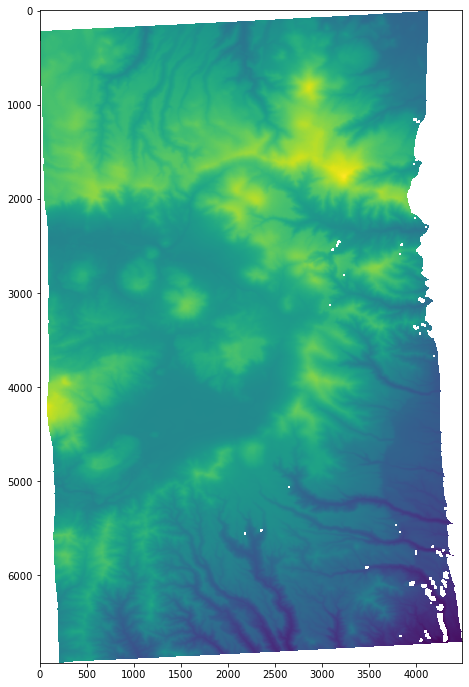

In [30]:
# test plot
fig, axes = plt.subplots(1, figsize=(8,12))
plt.imshow(fabdem_final)